# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [168]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [247]:
#City Url
city_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

#Setting up lists to hold response info and count variables
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
except_count = 0
record_count = 0
set_count = 1

#Loop to retrieve data, for every city change request url and get all data
#Added try/except when city not found
print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:    
    
    record_count += 1
    city_query = city_url+city
    response_json = requests.get(city_query).json()
    
    try:
        print(f"Processing record {record_count} of set {set_count}. | {city}")
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
    except:
        print("City not found. Skipping...")
        except_count += 1
        lat.append("na")
        lng.append("na")
        max_temp.append("na")
        humidity.append("na")
        cloudiness.append("na")
        wind_speed.append("na")
        country.append("na")
        date.append("na")
    
    if record_count >= 50:
        set_count += 1
        record_count = 0
        time.sleep(5)
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

#Creating a dictionary with retrieved data and converting to DF
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
}
weather_data = pd.DataFrame(weather_dict)

#Manually adding time of retrieved data
weather_time = datetime.now().strftime('%m/%d/%y')

Beginning Data Retrieval
------------------------------
Processing record 1 of set 1. | nome
Processing record 2 of set 1. | port elizabeth
Processing record 3 of set 1. | kavaratti
Processing record 4 of set 1. | turukhansk
Processing record 5 of set 1. | sao joao da barra
Processing record 6 of set 1. | talesh
City not found. Skipping...
Processing record 7 of set 1. | jamestown
Processing record 8 of set 1. | punta arenas
Processing record 9 of set 1. | shevchenkove
Processing record 10 of set 1. | teguldet
Processing record 11 of set 1. | vaitape
Processing record 12 of set 1. | vaini
Processing record 13 of set 1. | hilo
Processing record 14 of set 1. | severo-kurilsk
Processing record 15 of set 1. | hermanus
Processing record 16 of set 1. | kahului
Processing record 17 of set 1. | busselton
Processing record 18 of set 1. | jumla
Processing record 19 of set 1. | yellowknife
Processing record 20 of set 1. | esperance
Processing record 21 of set 1. | chabahar
Processing record 22 of

Processing record 36 of set 4. | bababe
City not found. Skipping...
Processing record 37 of set 4. | naze
Processing record 38 of set 4. | auki
Processing record 39 of set 4. | hue
Processing record 40 of set 4. | mogocha
Processing record 41 of set 4. | vaitupu
City not found. Skipping...
Processing record 42 of set 4. | skopin
Processing record 43 of set 4. | vallenar
Processing record 44 of set 4. | upernavik
Processing record 45 of set 4. | pisco
Processing record 46 of set 4. | luderitz
Processing record 47 of set 4. | pawa
Processing record 48 of set 4. | cockburn town
Processing record 49 of set 4. | ilulissat
Processing record 50 of set 4. | fortuna
Processing record 1 of set 5. | bonthe
Processing record 2 of set 5. | great yarmouth
Processing record 3 of set 5. | balkanabat
Processing record 4 of set 5. | arona
Processing record 5 of set 5. | karratha
Processing record 6 of set 5. | bredasdorp
Processing record 7 of set 5. | ngukurr
City not found. Skipping...
Processing reco

Processing record 21 of set 8. | bolanos de calatrava
Processing record 22 of set 8. | hobyo
Processing record 23 of set 8. | olafsvik
Processing record 24 of set 8. | port augusta
Processing record 25 of set 8. | felidhoo
City not found. Skipping...
Processing record 26 of set 8. | srednekolymsk
Processing record 27 of set 8. | alofi
Processing record 28 of set 8. | russell
Processing record 29 of set 8. | coahuayana
Processing record 30 of set 8. | port lincoln
Processing record 31 of set 8. | margate
Processing record 32 of set 8. | xiamen
Processing record 33 of set 8. | marcona
City not found. Skipping...
Processing record 34 of set 8. | qostanay
Processing record 35 of set 8. | ungheni
Processing record 36 of set 8. | salalah
Processing record 37 of set 8. | verkhniy uslon
Processing record 38 of set 8. | vestmannaeyjar
Processing record 39 of set 8. | bani
Processing record 40 of set 8. | semey
Processing record 41 of set 8. | butaritari
Processing record 42 of set 8. | mahina
P

Processing record 6 of set 12. | dillon
Processing record 7 of set 12. | celestun
Processing record 8 of set 12. | ipameri
Processing record 9 of set 12. | conde
Processing record 10 of set 12. | qasigiannguit
Processing record 11 of set 12. | laguna
Processing record 12 of set 12. | boditi
Processing record 13 of set 12. | oriximina
Processing record 14 of set 12. | sadovoye
Processing record 15 of set 12. | victor harbor
Processing record 16 of set 12. | port moresby
Processing record 17 of set 12. | yongchang
Processing record 18 of set 12. | khonuu
City not found. Skipping...
Processing record 19 of set 12. | aswan
Processing record 20 of set 12. | tonantins
Processing record 21 of set 12. | sovetskiy
Processing record 22 of set 12. | saint-francois
Processing record 23 of set 12. | coihaique
Processing record 24 of set 12. | sambava
Processing record 25 of set 12. | bumbesti-jiu
Processing record 26 of set 12. | maldonado
Processing record 27 of set 12. | kasongo-lunda
Processing 

In [248]:
#Removing cities not found from DF
clean_weather_data = weather_data.loc[weather_data["Date"]!="na"]
len(clean_weather_data)

577

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [249]:
#Removing cities not found from DF
clean_weather_data = weather_data.loc[weather_data["Date"]!="na"]

#Exporting to csv file
clean_weather_data.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

#Importing csv to new df to double check info and change format of columns, previously objects
csv_weather_data = pd.read_csv("city_weather_data.csv")
csv_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nome,64.5011,-165.4064,25.00,68,1,11.50,US,1619720950
1,port elizabeth,-33.9180,25.5701,59.00,88,0,11.50,ZA,1619721354
2,kavaratti,10.5669,72.6420,85.10,71,35,4.70,IN,1619720978
3,turukhansk,65.8167,87.9833,26.71,87,97,9.17,RU,1619721355
4,sao joao da barra,-21.6403,-41.0511,75.20,69,75,13.80,BR,1619721355
...,...,...,...,...,...,...,...,...,...
572,camacha,33.0833,-16.3333,64.40,59,40,10.36,PT,1619721596
573,yayva,59.3303,57.2641,34.00,80,62,4.54,RU,1619721596
574,paamiut,61.9940,-49.6678,37.17,82,2,5.84,GL,1619721597
575,egvekinot,66.3167,-179.1667,16.86,84,12,5.03,RU,1619721597


In [250]:
csv_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.935607,17.186981,62.328527,69.596187,52.741768,7.514575,1.619721e+09
std,33.667604,90.159491,19.998374,22.783435,38.873337,4.971449,2.274045e+02
min,-54.800000,-179.166700,-1.080000,6.000000,0.000000,0.290000,1.619721e+09
25%,-8.767600,-63.598600,49.660000,55.000000,14.000000,3.980000,1.619721e+09
50%,25.021300,22.466700,66.200000,73.000000,55.000000,6.420000,1.619721e+09
75%,48.516800,92.170300,77.700000,88.000000,90.000000,10.110000,1.619722e+09
max,78.218600,178.004200,105.800000,100.000000,100.000000,31.070000,1.619722e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [251]:
#I had no cities over 100% humidity but used to double check
clean_city_data = csv_weather_data.loc[csv_weather_data["Humidity"]<=100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nome,64.5011,-165.4064,25.00,68,1,11.50,US,1619720950
1,port elizabeth,-33.9180,25.5701,59.00,88,0,11.50,ZA,1619721354
2,kavaratti,10.5669,72.6420,85.10,71,35,4.70,IN,1619720978
3,turukhansk,65.8167,87.9833,26.71,87,97,9.17,RU,1619721355
4,sao joao da barra,-21.6403,-41.0511,75.20,69,75,13.80,BR,1619721355
...,...,...,...,...,...,...,...,...,...
572,camacha,33.0833,-16.3333,64.40,59,40,10.36,PT,1619721596
573,yayva,59.3303,57.2641,34.00,80,62,4.54,RU,1619721596
574,paamiut,61.9940,-49.6678,37.17,82,2,5.84,GL,1619721597
575,egvekinot,66.3167,-179.1667,16.86,84,12,5.03,RU,1619721597


In [252]:
#  Get the indices of cities that have humidity over 100%.
# Skipping there are no cases

In [253]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

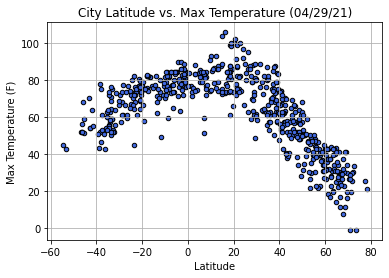

This scatter plot is showing the Temperature of each city by the Latitude. As we can observe, the maximum temperatures are highest as the latitude approaches 0-20.


In [254]:
#Generating plot, with title and labels. Adding explanation after plot. 
clean_city_data.plot(kind='scatter',x='Lat',y='Max Temp', color="royalblue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({weather_time})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Export_Images/lat_vs_maxtemp.png")
plt.show()
print("This scatter plot is showing the Temperature of each city by the Latitude. As we can observe, the maximum temperatures are highest as the latitude approaches 0-20.")

## Latitude vs. Humidity Plot

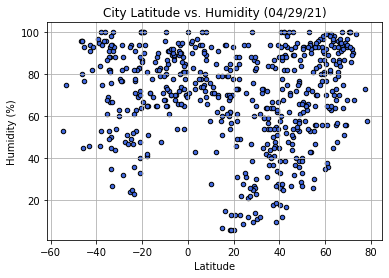

This scatter plot is showing the Humidity of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.


In [255]:
#Generating plot, with title and labels. Adding explanation after plot. 
clean_city_data.plot(kind='scatter',x='Lat',y='Humidity', color="royalblue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({weather_time})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Export_Images/lat_vs_humidity.png")
plt.show()
print("This scatter plot is showing the Humidity of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.")

## Latitude vs. Cloudiness Plot

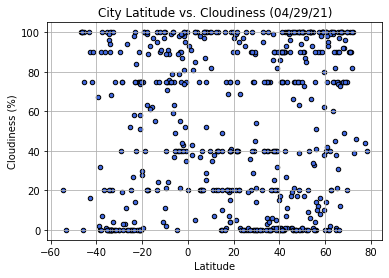

This scatter plot is showing the Cloudiness of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.


In [256]:
#Generating plot, with title and labels. Adding explanation after plot. 
clean_city_data.plot(kind='scatter',x='Lat',y='Cloudiness', color="royalblue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({weather_time})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Export_Images/lat_vs_cloudiness.png")
plt.show()
print("This scatter plot is showing the Cloudiness of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.")

## Latitude vs. Wind Speed Plot

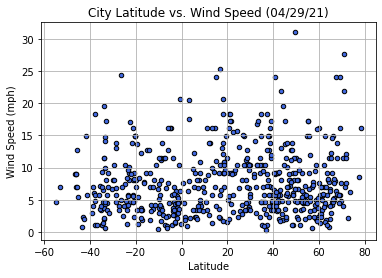

This scatter plot is showing the Wind Speed of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.


In [257]:
#Generating plot, with title and labels. Adding explanation after plot. 
clean_city_data.plot(kind='scatter',x='Lat',y='Wind Speed', color="royalblue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({weather_time})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Export_Images/lat_vs_windspeed.png")
plt.show()
print("This scatter plot is showing the Wind Speed of each city by the Latitude. We can say that all points are generally scattered randomly which means we expect to have no relationship.")

## Linear Regression

In [258]:
#Separate DF into Northern and Southern Hemispheres
northern_weather_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
southern_weather_data = clean_city_data.loc[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8641314834964643


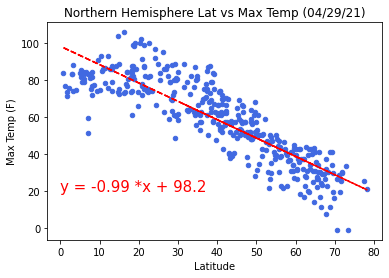

In [260]:
#Plotting NH Max Temp vs Lat
northern_weather_data.plot(kind='scatter',x='Lat',y='Max Temp', color="royalblue")
plt.title(f"Northern Hemisphere Lat vs Max Temp ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#Get regression line
nh_temp_slope, nh_temp_intercept, nh_temp_rvalue, nh_temp_pvalue, nh_temp_stderr = linregress(northern_weather_data["Lat"], northern_weather_data["Max Temp"])
nh_temp_regress_values = nh_temp_slope * northern_weather_data["Lat"] + nh_temp_intercept
nh_temp_line = (f"y = {round(nh_temp_slope,2)} *x + {round(nh_temp_intercept,2)}")

#Plot regression line
plt.plot(northern_weather_data["Lat"],nh_temp_regress_values, "r--")
plt.annotate(nh_temp_line,(0,20),fontsize=15,color="red")

print(f"The r-value is: {nh_temp_rvalue}")
plt.savefig("Export_Images/nh_lat_vs_maxtemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7456521603356191


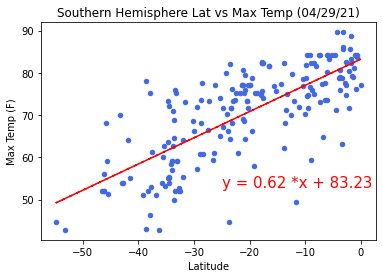

In [262]:
#Plotting SH Max Temp vs Lat
southern_weather_data.plot(kind='scatter',x='Lat',y='Max Temp', color="royalblue")
plt.title(f"Southern Hemisphere Lat vs Max Temp ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#Get regression line
sh_temp_slope, sh_temp_intercept, sh_temp_rvalue, sh_temp_pvalue, sh_temp_stderr = linregress(southern_weather_data["Lat"], southern_weather_data["Max Temp"])
sh_temp_regress_values = sh_temp_slope * southern_weather_data["Lat"] + sh_temp_intercept
sh_temp_line = (f"y = {round(sh_temp_slope,2)} *x + {round(sh_temp_intercept,2)}")

#Plot regression line
plt.plot(southern_weather_data["Lat"],sh_temp_regress_values, "r--")
plt.annotate(sh_temp_line,(-25,53),fontsize=15,color="red")

print(f"The r-value is: {sh_temp_rvalue}")
plt.savefig("Export_Images/sh_lat_vs_maxtemp.png")
plt.show()

In [275]:
print("Similar to the conclusion drawn from the Latitude vs Temperature plot, we can see in both the Northern and Southern Hemisphere plots that there is a Strong correlation between both variables. In the Northern Hemisphere the R value is -.86 that tells us the strong negative correlation, as the latitude increases we expect the Max Temperature to drop. For the Southern Hemisphere plot we have an R of 0.75, representing a strong positive correlation.")

Similar to the conclusion drawn from the Latitude vs Temperature plot, we can see in both the Northern and Southern Hemisphere plots that there is a Strong correlation between both variables. In the Northern Hemisphere the R value is -.86 that tells us the strong negative correlation, as the latitude increases we expect the Max Temperature to drop. For the Southern Hemisphere plot we have an R of 0.75, representing a strong positive correlation.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18217729527339624


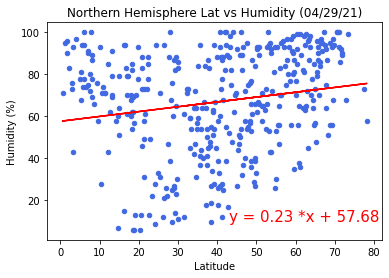

In [263]:
#Plotting NH Humidity vs Lat
northern_weather_data.plot(kind='scatter',x='Lat',y='Humidity', color="royalblue")
plt.title(f"Northern Hemisphere Lat vs Humidity ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Get regression line
nh_humidity_slope, nh_humidity_intercept, nh_humidity_rvalue, nh_humidity_pvalue, nh_humidity_stderr = linregress(northern_weather_data["Lat"], northern_weather_data["Humidity"])
nh_humidity_regress_values = nh_humidity_slope * northern_weather_data["Lat"] + nh_humidity_intercept
nh_humidity_line = (f"y = {round(nh_humidity_slope,2)} *x + {round(nh_humidity_intercept,2)}")

#Plot regression line
plt.plot(northern_weather_data["Lat"],nh_humidity_regress_values, "r-")
plt.annotate(nh_humidity_line,(43,10),fontsize=15,color="red")

print(f"The r-value is: {nh_humidity_rvalue}")
plt.savefig("Export_Images/nh_lat_vs_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05703624765592434


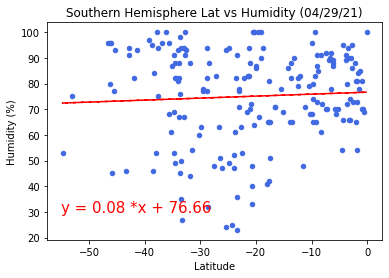

In [265]:
#Plotting SH Humidity vs Lat
southern_weather_data.plot(kind='scatter',x='Lat',y='Humidity', color="royalblue")
plt.title(f"Southern Hemisphere Lat vs Humidity ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Get regression line
sh_humidity_slope, sh_humidity_intercept, sh_humidity_rvalue, sh_humidity_pvalue, sh_humidity_stderr = linregress(southern_weather_data["Lat"], southern_weather_data["Humidity"])
sh_humidity_regress_values = sh_humidity_slope * southern_weather_data["Lat"] + sh_humidity_intercept
sh_humidity_line = (f"y = {round(sh_humidity_slope,2)} *x + {round(sh_humidity_intercept,2)}")

#Plot regression line
plt.plot(southern_weather_data["Lat"],sh_humidity_regress_values, "r--")
plt.annotate(sh_humidity_line,(-55,30),fontsize=15,color="red")

print(f"The r-value is: {sh_humidity_rvalue}")
plt.savefig("Export_Images/sh_lat_vs_humidity.png")
plt.show()

In [278]:
print("For both previous Hemispheres plots we have R values where the absolute value is less than 0.2, this data tells us that there is no correlation between the Latitude and Humidity percentage.")

For both previous Hemispheres plots we have R values where the absolute value is less than 0.2, this data tells us that there is no correlation between the Latitude and Humidity percentage.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15715288256998697


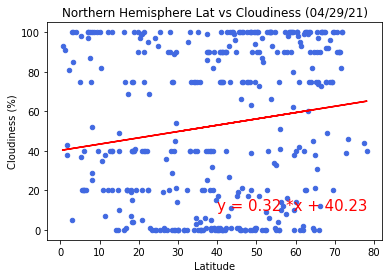

In [266]:
#Plotting NH Cloudiness vs Lat
northern_weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', color="royalblue")
plt.title(f"Northern Hemisphere Lat vs Cloudiness ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Get regression line
nh_cloudiness_slope, nh_cloudiness_intercept, nh_cloudiness_rvalue, nh_cloudiness_pvalue, nh_cloudiness_stderr = linregress(northern_weather_data["Lat"], northern_weather_data["Cloudiness"])
nh_cloudiness_regress_values = nh_cloudiness_slope * northern_weather_data["Lat"] + nh_cloudiness_intercept
nh_cloudiness_line = (f"y = {round(nh_cloudiness_slope,2)} *x + {round(nh_cloudiness_intercept,2)}")

#Plot regression line
plt.plot(northern_weather_data["Lat"],nh_cloudiness_regress_values, "r-")
plt.annotate(nh_cloudiness_line,(40,10),fontsize=15,color="red")

print(f"The r-value is: {nh_cloudiness_rvalue}")
plt.savefig("Export_Images/nh_lat_vs_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.246410695983276


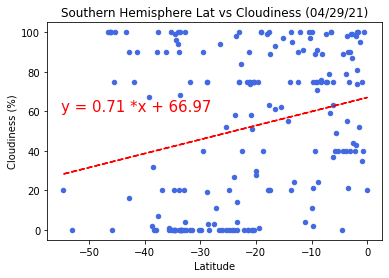

In [267]:
#Plotting SH Cloudiness vs Lat
southern_weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', color="royalblue")
plt.title(f"Southern Hemisphere Lat vs Cloudiness ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Get regression line
sh_cloudiness_slope, sh_cloudiness_intercept, sh_cloudiness_rvalue, sh_cloudiness_pvalue, sh_cloudiness_stderr = linregress(southern_weather_data["Lat"], southern_weather_data["Cloudiness"])
sh_cloudiness_regress_values = sh_cloudiness_slope * southern_weather_data["Lat"] + sh_cloudiness_intercept
sh_cloudiness_line = (f"y = {round(sh_cloudiness_slope,2)} *x + {round(sh_cloudiness_intercept,2)}")

#Plot regression line
plt.plot(southern_weather_data["Lat"],sh_cloudiness_regress_values, "r--")
plt.annotate(sh_cloudiness_line,(-55,60),fontsize=15,color="red")

print(f"The r-value is: {sh_cloudiness_rvalue}")
plt.savefig("Export_Images/sh_lat_vs_cloudiness.png")
plt.show()

In [277]:
print("Similar to humidity for both previous Hemisphere plots we have R values where the absolute value is less than 0.25, this data tells us that there is no correlation between the Latitude and Cloudiness percentage.")

Similar to humidity for both previous Hemisphere plots we have R values where the absolute value is less than 0.25, this data tells us that there is no correlation between the Latitude and Cloudiness percentage.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.04716327231815234


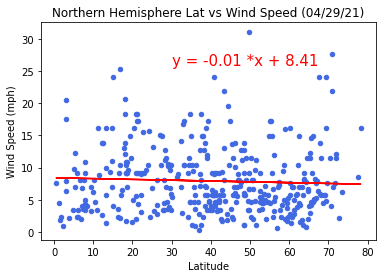

In [271]:
#Plotting NH Wind Speed vs Lat
northern_weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', color="royalblue")
plt.title(f"Northern Hemisphere Lat vs Wind Speed ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Get regression line
nh_wind_slope, nh_wind_intercept, nh_wind_rvalue, nh_wind_pvalue, nh_wind_stderr = linregress(northern_weather_data["Lat"], northern_weather_data["Wind Speed"])
nh_wind_regress_values = nh_wind_slope * northern_weather_data["Lat"] + nh_wind_intercept
nh_wind_line = (f"y = {round(nh_wind_slope,2)} *x + {round(nh_wind_intercept,2)}")

#Plot regression line
plt.plot(northern_weather_data["Lat"],nh_wind_regress_values, "r-")
plt.annotate(nh_wind_line,(30,26),fontsize=15,color="red")

print(f"The r-value is: {nh_wind_rvalue}")
plt.savefig("Export_Images/nh_lat_vs_windspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.06599577896718471


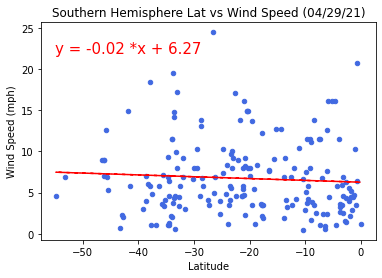

In [273]:
#Plotting SH Wind Speed vs Lat
southern_weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', color="royalblue")
plt.title(f"Southern Hemisphere Lat vs Wind Speed ({weather_time})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Get regression line
sh_wind_slope, sh_wind_intercept, sh_wind_rvalue, sh_wind_pvalue, sh_wind_stderr = linregress(southern_weather_data["Lat"], southern_weather_data["Wind Speed"])
sh_wind_regress_values = sh_wind_slope * southern_weather_data["Lat"] + sh_wind_intercept
sh_wind_line = (f"y = {round(sh_wind_slope,2)} *x + {round(sh_wind_intercept,2)}")

#Plot regression line
plt.plot(southern_weather_data["Lat"],sh_wind_regress_values, "r--")
plt.annotate(sh_wind_line,(-55,22),fontsize=15,color="red")

print(f"The r-value is: {sh_wind_rvalue}")
plt.savefig("Export_Images/sh_lat_vs_windspeed.png")
plt.show()

In [280]:
print("For the last two Hemisphere plots we have R values where the absolute value is less than 0.05, this data tells us that there is no correlation between the Latitude and Wind Speed. These last pair of variables had the smallest R values which means these are the least correlated information we checked.")

For the last two Hemisphere plots we have R values where the absolute value is less than 0.05, this data tells us that there is no correlation between the Latitude and Wind Speed. These last pair of variables had the smallest R values which means these are the least correlated information we checked.
